### 데이터 전처리

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import matplotlib

matplotlib.rcParams['font.family'] = 'AppleGothic'
df = pd.read_csv('/Users/admin/HMG/W2/Sentiment Analysis/blind3.csv')
df.head()

,Unnamed: 0,총점,커리어 향상,업무와 삶의 균형,급여 및 복지,사내 문화,경영진,제목,직원유형,장점,단점
0,0,1.0,1,1,1,1,1,"“연봉 속이는 최악의 회사(신입4천대/대리5천대), 7년째 매년 하락중”",현직원 · 현********* · 구매·물류·SCM 전문가 - 2020.09.18,연봉 높은 회사인줄 알고 사람들이 현차 다니는구나 라고 하는 경우가 많음 다 거짓말임,회사 유보 이익을 정당히 처분하지 않고 최상위 임원 혼자 대놓고 연봉 상승시킴
1,1,1.0,1,1,1,1,1,“인재 멸시의 현대자동차”,현직원 · I********* · 연구개발(R&D) - 2020.09.22,일 안해도 월급 똑같이 줍니다\n열심히 해도 고과는 어차피 인맥이랑 짬순이라\n놀고...,일 하면 돈은 안주고 일을 더 줍니다\n능력있는 사람들은 뼛가루까지 갈아먹고\n고과...
2,2,1.0,1,1,1,1,1,“진실된 리뷰는 '추천수'로 확인하세요”,현직원 · 이******** · 연구개발(R&D) - 2023.08.11,잘못된 리뷰가 많아 진실된 정보만 적습니다\n\n1 차 할인\n2 팀 분위기에 따라...,1 책임 진급 전까지 낮은 사원 기본급4000후반5000초반 타 대기업 대비 처참한...
3,3,2.0,1,5,4,3,1,"“미래가없는 회사, 꿀빠는게 답이다라고 강요하는 회사”",현직원 · l********* · 연구개발(R&D) - 2020.09.25,워라밸은 최고라해도 손색없음\n회사시스템자체가 꿀빠는게 이익이라 말하는듯한 구조\n...,의사결정 주체가 없는 덩치큰 바보회사\n서로 결정을 미루다 문제 커지면 급한사람이 ...
4,4,1.0,1,4,1,1,1,“회사가 잘나가도 입사후부터 연봉이 수직하강함”,현직원 · l******** · 연구개발(R&D) - 2020.10.05,팀만 잘 고르면 워라밸 보장\n극단적으로 하루에 한시간정도만 일해도 되는 팀도 있음,첨에 팀을 잘못골라서 밥도 못먹고 일하고 노가다 뛰기 일수였음 그런팀은 일한다고 위...


In [11]:
# 데이터 전처리
df['단점'] = df['단점'].fillna('')
df['현직원/퇴사자'] = df['직원유형'].str.split('·').str[0].str.strip()
df['직무'] = df['직원유형'].str.split('·').str[2].str.split('-').str[0].str.strip()
df = df[df['커리어 향상'] != 0]
df = df.drop(columns=['Unnamed: 0', '직원유형', '현직원/퇴사자'])

df

,총점,커리어 향상,업무와 삶의 균형,급여 및 복지,사내 문화,경영진,제목,장점,단점,직무
0,1.0,1,1,1,1,1,"“연봉 속이는 최악의 회사(신입4천대/대리5천대), 7년째 매년 하락중”",연봉 높은 회사인줄 알고 사람들이 현차 다니는구나 라고 하는 경우가 많음 다 거짓말임,회사 유보 이익을 정당히 처분하지 않고 최상위 임원 혼자 대놓고 연봉 상승시킴,구매
1,1.0,1,1,1,1,1,“인재 멸시의 현대자동차”,일 안해도 월급 똑같이 줍니다\n열심히 해도 고과는 어차피 인맥이랑 짬순이라\n놀고...,일 하면 돈은 안주고 일을 더 줍니다\n능력있는 사람들은 뼛가루까지 갈아먹고\n고과...,연구개발(R&D)
2,1.0,1,1,1,1,1,“진실된 리뷰는 '추천수'로 확인하세요”,잘못된 리뷰가 많아 진실된 정보만 적습니다\n\n1 차 할인\n2 팀 분위기에 따라...,1 책임 진급 전까지 낮은 사원 기본급4000후반5000초반 타 대기업 대비 처참한...,연구개발(R&D)
3,2.0,1,5,4,3,1,"“미래가없는 회사, 꿀빠는게 답이다라고 강요하는 회사”",워라밸은 최고라해도 손색없음\n회사시스템자체가 꿀빠는게 이익이라 말하는듯한 구조\n...,의사결정 주체가 없는 덩치큰 바보회사\n서로 결정을 미루다 문제 커지면 급한사람이 ...,연구개발(R&D)
4,1.0,1,4,1,1,1,“회사가 잘나가도 입사후부터 연봉이 수직하강함”,팀만 잘 고르면 워라밸 보장\n극단적으로 하루에 한시간정도만 일해도 되는 팀도 있음,첨에 팀을 잘못골라서 밥도 못먹고 일하고 노가다 뛰기 일수였음 그런팀은 일한다고 위...,연구개발(R&D)
...,...,...,...,...,...,...,...,...,...,...
6961,2.0,3,5,2,4,1,“워라벨은 좋음”,워라벨 좋다고 생각함\n아침 점심 저녁 밥은 잘 챙겨줌\n밥 맛있음,영업이익 대비 돈을 안주려고 노력하는 경영진\n출근길 너무 막힘,연구개발(R&D)
6962,2.0,2,3,2,2,2,“부서마다 분위기가 판이함”,변화의 기로에 있어 새로운 시도를 많이하려고함\n연차가 낮은 분들에게 성장기회 많음,보고라인이 많은 편 부서마다 분위기가 너무 다르기에 신중해야함,마케팅
6963,2.0,2,4,3,2,1,“무능한 경영진 고인물 회사”,그나마 워라벨 괜찮으나 나머지는 모두 단점으로 느껴진다,무능한 경영진 고인물 시스템이 진짜 개느리고 비효율적임,마케팅
6964,1.0,2,2,1,1,1,“성과에 보상은 없다”,개인연금 20만원이 아닌 2만원 지원 20아니다 2만원이다,성과에 보상은 없다 경영진은 보상을 받고 직원은 그냥 직원일뿐인회사 주먹구구식 일처...,생산엔지니어


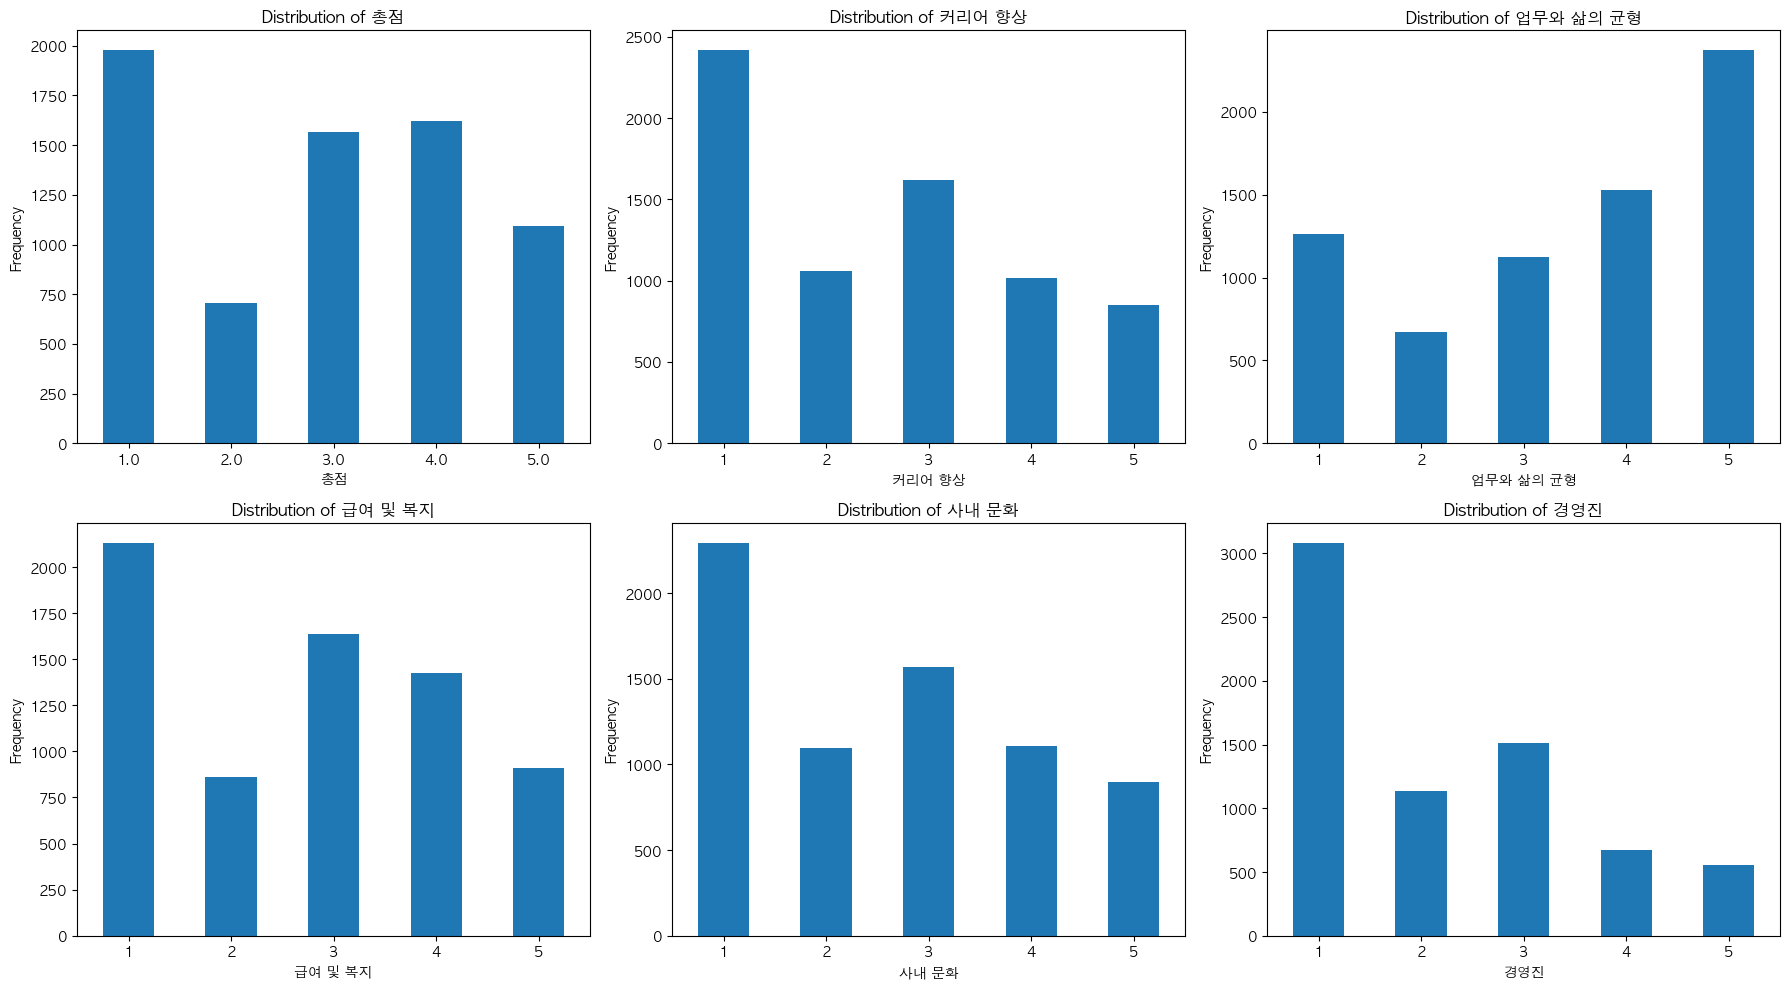

In [12]:
# EDA
columns = ['총점', '커리어 향상', '업무와 삶의 균형', '급여 및 복지', '사내 문화', '경영진']
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(18, 10))
axes = axes.flatten()

for i, column in enumerate(columns):
    value_counts = df[column].value_counts().sort_index() 
    value_counts.plot(kind='bar', ax=axes[i])
    axes[i].set_title(f'Distribution of {column}')
    axes[i].set_xlabel(column)
    axes[i].set_ylabel('Frequency')
    axes[i].tick_params(axis='x', rotation=0)
    
plt.tight_layout()
plt.show()

# 워드클라우드

In [ ]:
#!pip install konlpy

In [13]:
#%%bash
#apt-get update
#apt-get install g++ openjdk-8-jdk python-dev python3-dev
#!pip3 install JPype1
#!pip3 install konlpy
#!apt-get update -qq
#!apt-get install fonts-nanum*-qq

%env JAVA_HOME "/usr/lib/jvm/java-8-openjdk-amd64"  
import konlpy
from konlpy.tag import Kkma, Komoran, Hannanum, Okt
from konlpy.utils import pprint
from konlpy.tag import Mecab
from wordcloud import WordCloud
from collections import Counter
from PIL import Image

env: JAVA_HOME="/usr/lib/jvm/java-8-openjdk-amd64"


In [19]:
from collections import Counter
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from konlpy.tag import Okt

def make_word_cloud(arg, description, ax):
    okt = Okt()
    nouns = okt.nouns(arg)  # 명사만 추출
    words = [n for n in nouns if len(n) > 1]  # 단어의 길이가 1개인 것은 제외
    cons = Counter(words)  # 단어별 빈도수 딕셔너리 데이터 생성
    
    # 특정 단어와 그 횟수 제거하기
    words_to_remove = ["회사"]
    for remove_word in words_to_remove:
        if remove_word in cons:
            del cons[remove_word]
            
    # 특정 단어 교체하기
    if "라벨" in cons:
        cons["워라벨"] = cons.pop("라벨")

    wc = WordCloud(
        font_path="AppleGothic",
        width=400,
        height=400,
        scale=2.0,
        max_font_size=250,
        background_color="white",
    )
    result = wc.generate_from_frequencies(cons)
    ax.imshow(result, interpolation="bilinear")
    ax.set_title(description)
    ax.axis("off")

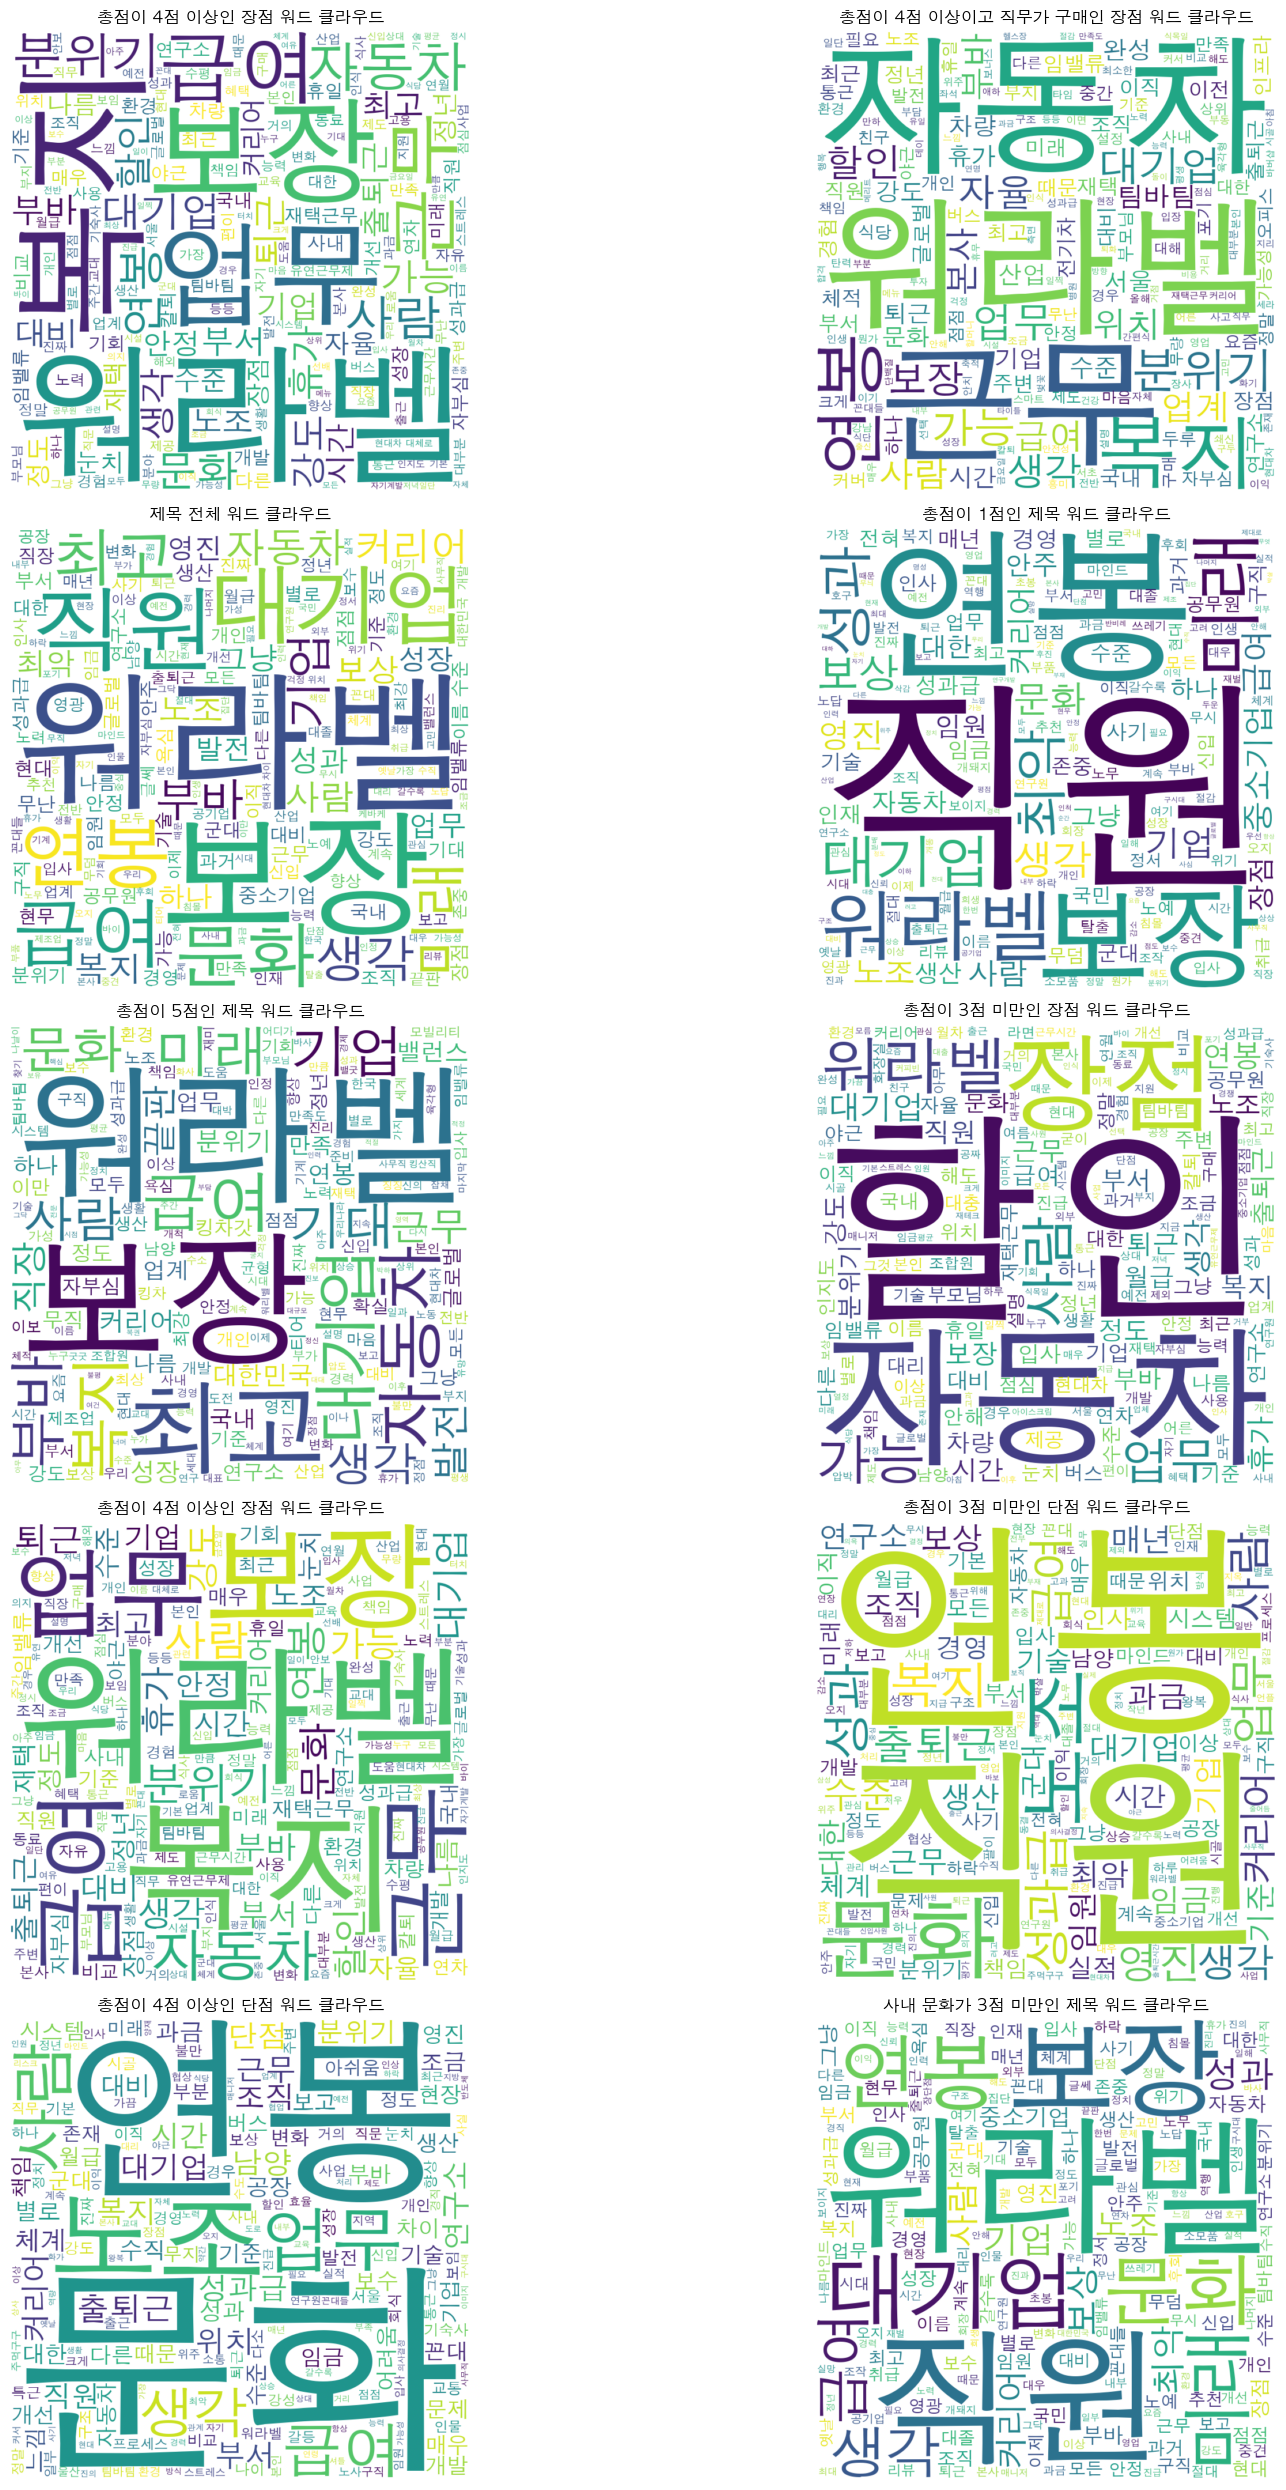

In [20]:
# 워드 클라우드를 생성할 데이터와 제목
word_cloud_data = [
    (df[df["총점"] >= 4]["장점"].str.cat(sep=" "), "총점이 4점 이상인 장점 워드 클라우드"),
    (df[(df["총점"] >= 4) & (df["직무"] == '구매')]["장점"].str.cat(sep=" "), "총점이 4점 이상이고 직무가 구매인 장점 워드 클라우드"),
    (df["제목"].str.cat(sep=" "), "제목 전체 워드 클라우드"),
    (df[df["총점"] == 1]["제목"].str.cat(sep=" "), "총점이 1점인 제목 워드 클라우드"),
    (df[df["총점"] == 5]["제목"].str.cat(sep=" "), "총점이 5점인 제목 워드 클라우드"),
    (df[df["총점"] <= 2]["장점"].str.cat(sep=" "), "총점이 3점 미만인 장점 워드 클라우드"),
    (df[df["총점"] >= 4]["장점"].str.cat(sep=" "), "총점이 4점 이상인 장점 워드 클라우드"),
    (df[df["총점"] <= 2]["단점"].str.cat(sep=" "), "총점이 3점 미만인 단점 워드 클라우드"),
    (df[df["총점"] >= 4]["단점"].str.cat(sep=" "), "총점이 4점 이상인 단점 워드 클라우드"),
    (df[df["사내 문화"] <= 2]["제목"].str.cat(sep=" "), "사내 문화가 3점 미만인 제목 워드 클라우드")
]

fig, axes = plt.subplots(5, 2, figsize=(20, 25))  # 5x2 서브플롯
axes = axes.flatten()

for i, (text, description) in enumerate(word_cloud_data):
    make_word_cloud(text, description, axes[i])

plt.tight_layout()
plt.show()